In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

from helpers.split import label_strings, tag_label_feature_split

In [2]:
def knn_experiment(dataset, n_neighbors=5):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    class_names = le.inverse_transform(list(model.classes_))
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, model.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")

    return model

Train: train_accuracy = 0.620550

                 precision    recall  f1-score   support

    genre_blues     0.4533    0.0909    0.1514       374
genre_classical     0.7437    0.8993    0.8142      4221
  genre_country     0.7285    0.3364    0.4603       327
    genre_disco     0.3772    0.2180    0.2763       289
   genre_hiphop     0.5231    0.4721    0.4963      1701
     genre_jazz     0.5050    0.3650    0.4238      1241
    genre_metal     0.6969    0.5323    0.6036       665
      genre_pop     0.5338    0.6659    0.5925      4274
   genre_reggae     0.5945    0.2475    0.3495       788
     genre_rock     0.6520    0.6078    0.6291      3200

       accuracy                         0.6206     17080
      macro avg     0.5808    0.4435    0.4797     17080
   weighted avg     0.6131    0.6206    0.6040     17080

Test: test_accuracy = 0.536174

                 precision    recall  f1-score   support

    genre_blues     0.2353    0.0426    0.0721        94
genre_classical   

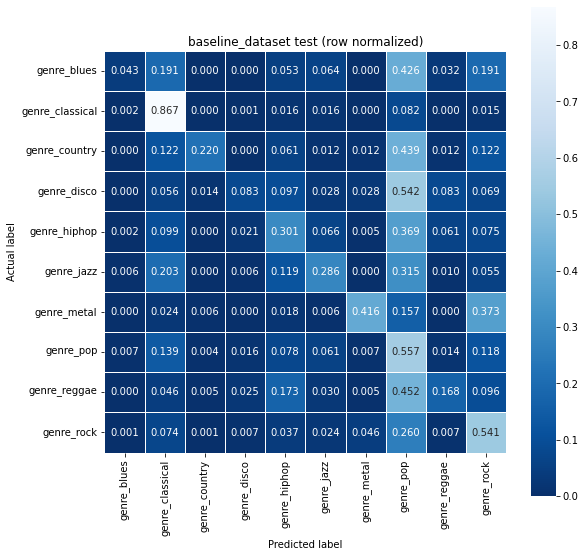

In [3]:
model_1 = knn_experiment("../../../datasets/baseline_dataset.pickle", n_neighbors=10)

Train: train_accuracy = 0.661066

                 precision    recall  f1-score   support

    genre_blues     0.5506    0.1310    0.2117       374
genre_classical     0.7686    0.9119    0.8341      4221
  genre_country     0.8443    0.4312    0.5709       327
    genre_disco     0.3069    0.2007    0.2427       289
   genre_hiphop     0.6242    0.4785    0.5418      1701
     genre_jazz     0.6190    0.5052    0.5563      1241
    genre_metal     0.6742    0.5383    0.5987       665
      genre_pop     0.5794    0.6869    0.6286      4274
   genre_reggae     0.6559    0.4911    0.5617       788
     genre_rock     0.6637    0.6475    0.6555      3200

       accuracy                         0.6611     17080
      macro avg     0.6287    0.5022    0.5402     17080
   weighted avg     0.6563    0.6611    0.6495     17080

Test: test_accuracy = 0.571529

                 precision    recall  f1-score   support

    genre_blues     0.1000    0.0106    0.0192        94
genre_classical   

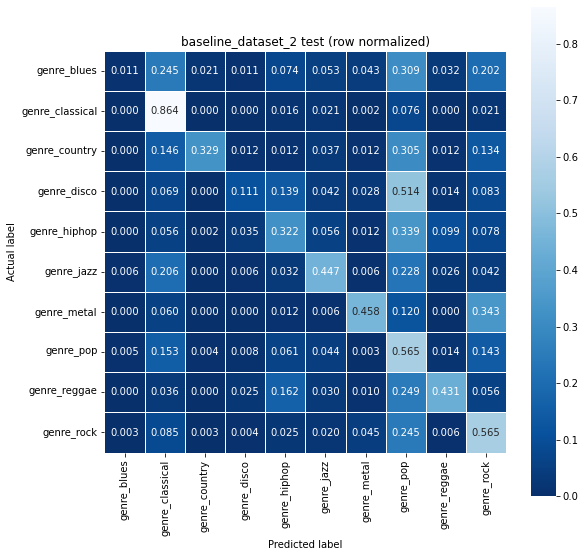

In [4]:
model_2 = knn_experiment("../../../datasets/baseline_dataset_2.pickle", n_neighbors=10)

Train: train_accuracy = 0.592506

                 precision    recall  f1-score   support

    genre_blues     0.2308    0.0401    0.0683       374
genre_classical     0.8082    0.8813    0.8432      4221
  genre_country     0.4768    0.2202    0.3013       327
    genre_disco     0.3178    0.1419    0.1962       289
   genre_hiphop     0.4293    0.4997    0.4618      1701
     genre_jazz     0.4827    0.3820    0.4265      1241
    genre_metal     0.5868    0.2797    0.3788       665
      genre_pop     0.5095    0.6303    0.5635      4274
   genre_reggae     0.4354    0.2437    0.3124       788
     genre_rock     0.6005    0.5863    0.5933      3200

       accuracy                         0.5925     17080
      macro avg     0.4878    0.3905    0.4145     17080
   weighted avg     0.5800    0.5925    0.5773     17080

Test: test_accuracy = 0.514399

                 precision    recall  f1-score   support

    genre_blues     0.0625    0.0106    0.0182        94
genre_classical   

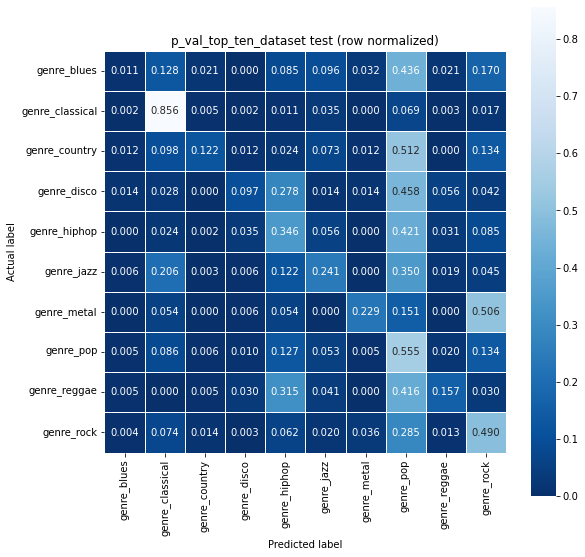

In [5]:
model_3 = knn_experiment(
    "../../../datasets/p_val_top_ten_dataset.pickle", n_neighbors=10
)